# Stock Market Prediction And Forecasting Using Stacked LSTM

## 1. Importing packages and datasets

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

from pandas_datareader.data import DataReader
from datetime import datetime

## 2. Importing datasets from Yahoo reader

In [2]:
# The tech stocks we will use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:   
    globals()[stock] = DataReader(stock, 'yahoo', start, end)

## 3. Display data characteristics

In [3]:
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

,High,Low,Open,Close,Volume,Adj Close,company_name
Date,,,,,,,
2022-04-11,3082.729980,3010.689941,3054.260010,3022.439941,2605600.0,3022.439941,AMAZON
2022-04-12,3101.979980,3007.659912,3073.850098,3015.750000,2758900.0,3015.750000,AMAZON
2022-04-13,3120.500000,2992.000000,3000.370117,3110.820068,2669500.0,3110.820068,AMAZON
2022-04-14,3117.939941,3029.439941,3107.800049,3034.129883,2575200.0,3034.129883,AMAZON
2022-04-18,3080.790039,3005.010010,3030.469971,3055.699951,2325700.0,3055.699951,AMAZON
2022-04-19,3172.979980,3031.010010,3040.590088,3162.310059,2746300.0,3162.310059,AMAZON
2022-04-20,3152.050049,3072.070068,3152.050049,3079.959961,2981500.0,3079.959961,AMAZON
2022-04-21,3134.760010,2951.790039,3094.280029,2965.919922,3198500.0,2965.919922,AMAZON
2022-04-22,2992.300049,2873.949951,2965.000000,2887.000000,3649800.0,2887.000000,AMAZON


## Individual Stocks Description

In [4]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,154.593597,151.396047,152.913439,153.066443,8.628709e+07,152.742751
std,16.324518,15.570716,15.979492,15.972388,2.554433e+07,16.150656
min,124.639999,122.250000,123.160004,122.769997,4.100000e+07,122.251923
25%,144.600006,142.029999,143.449997,143.240005,6.864767e+07,142.635544
50%,151.490005,149.009995,150.020004,150.020004,8.044080e+07,149.799149
75%,169.679993,165.500000,167.479996,166.559998,9.867070e+07,166.559998
max,182.940002,179.119995,182.630005,182.009995,1.954327e+08,181.778397


In [5]:
GOOG.describe()

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,2738.649337,2685.702276,2713.890205,2711.626706,1.256887e+06,2711.626706
std,185.378848,182.734924,185.437490,184.210691,5.090940e+05,184.210691
min,2276.601074,2230.050049,2261.090088,2239.080078,5.933000e+05,2239.080078
25%,2618.074951,2550.070068,2596.669922,2584.800049,9.312000e+05,2584.800049
50%,2767.989990,2714.000000,2742.194092,2740.090088,1.141600e+06,2740.090088
75%,2885.959961,2834.699951,2864.020020,2856.060059,1.423800e+06,2856.060059
max,3042.000000,2997.750000,3037.270020,3014.179932,4.487500e+06,3014.179932


In [6]:
MSFT.describe()

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,297.627826,291.860514,294.945928,294.886482,2.808053e+07,293.896856
std,26.661334,25.958096,26.430222,26.340000,1.065979e+07,26.613581
min,243.229996,238.070007,239.309998,239.000000,1.390020e+07,237.068970
25%,283.959991,277.390015,280.339996,280.269989,2.094480e+07,279.403076
50%,298.720001,293.489990,296.220001,296.029999,2.573980e+07,295.419159
75%,312.380005,306.459991,309.630005,310.200012,3.246160e+07,309.552460
max,349.670013,342.200012,344.619995,343.109985,9.042890e+07,342.402008


In [7]:
AMZN.describe()

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,3349.384186,3271.978189,3312.804710,3309.391677,3.441790e+06,3309.391677
std,199.183730,211.133759,203.691804,206.771071,1.419710e+06,206.771071
min,2805.000000,2671.449951,2733.669922,2720.290039,1.680300e+06,2720.290039
25%,3235.850098,3183.000000,3204.229980,3206.219971,2.562300e+06,3206.219971
50%,3358.000000,3296.000000,3335.000000,3320.679932,3.140300e+06,3320.679932
75%,3483.320068,3413.510010,3452.000000,3448.139893,3.845900e+06,3448.139893
max,3773.080078,3696.790039,3744.000000,3731.409912,1.267280e+07,3731.409912


## 4. Visualization of stocks

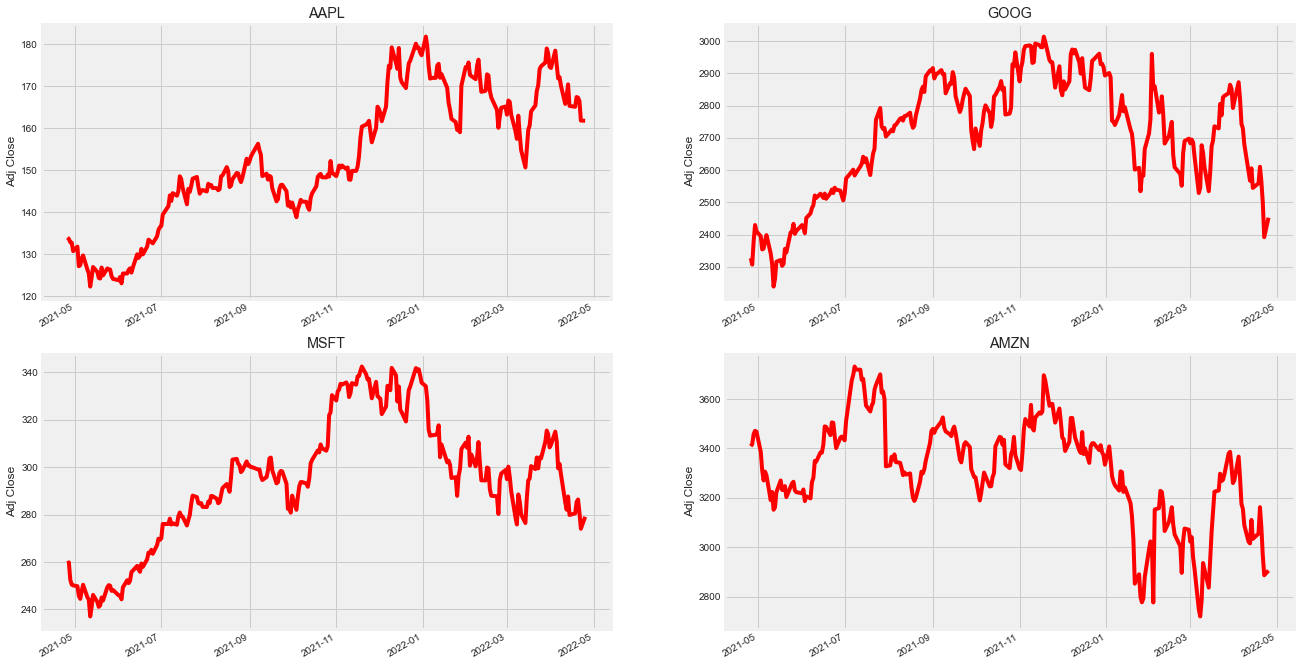

In [8]:
plt.figure(figsize=(20, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot(color='r')
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"{tech_list[i - 1]}")

## 5. Daily stocks exchange

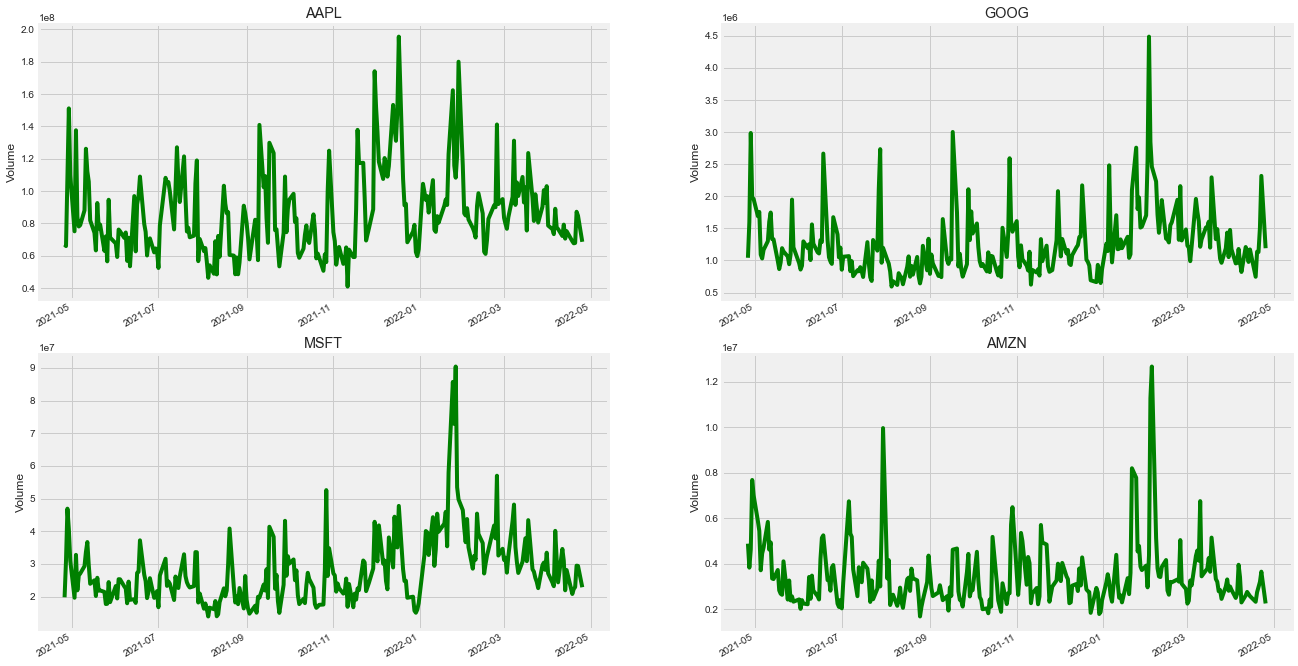

In [9]:
# Plotting the total volume of stock being traded each day
plt.figure(figsize=(20, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot(color='g')
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"{tech_list[i - 1]}")

## 6. Moving Average of different stocks

In [10]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

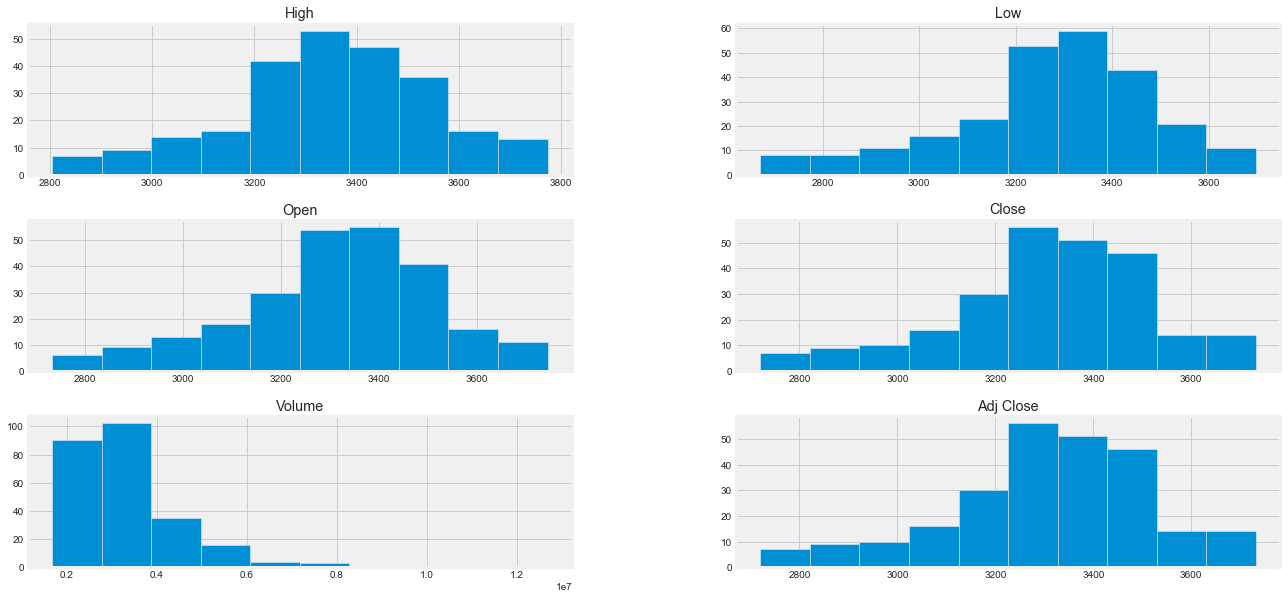

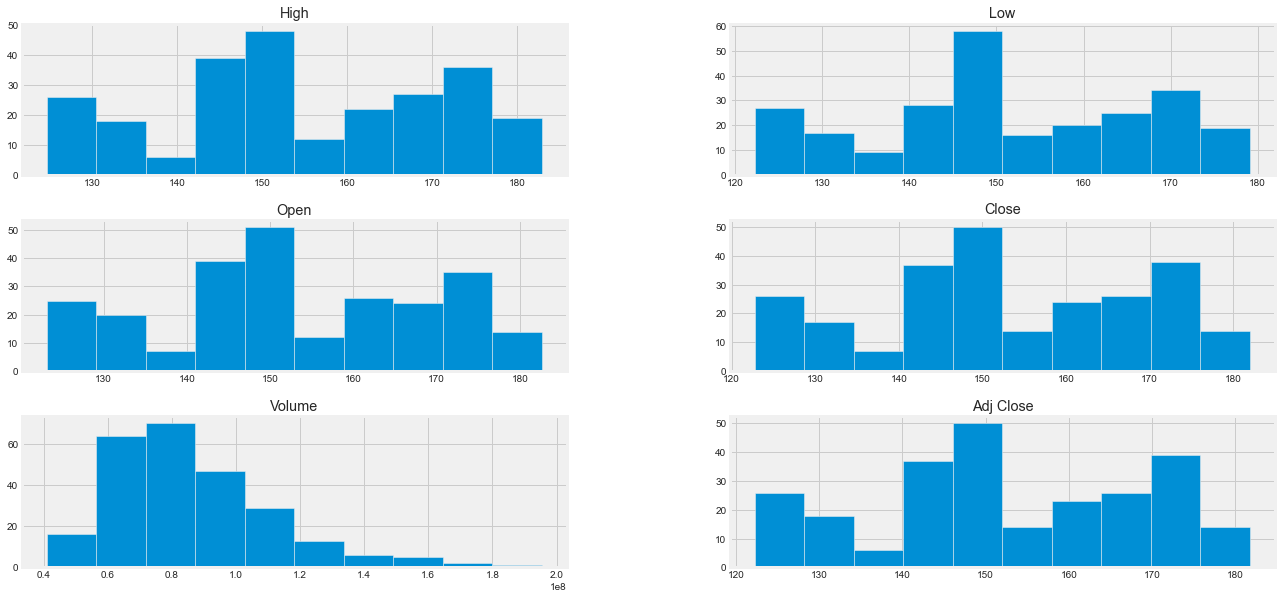

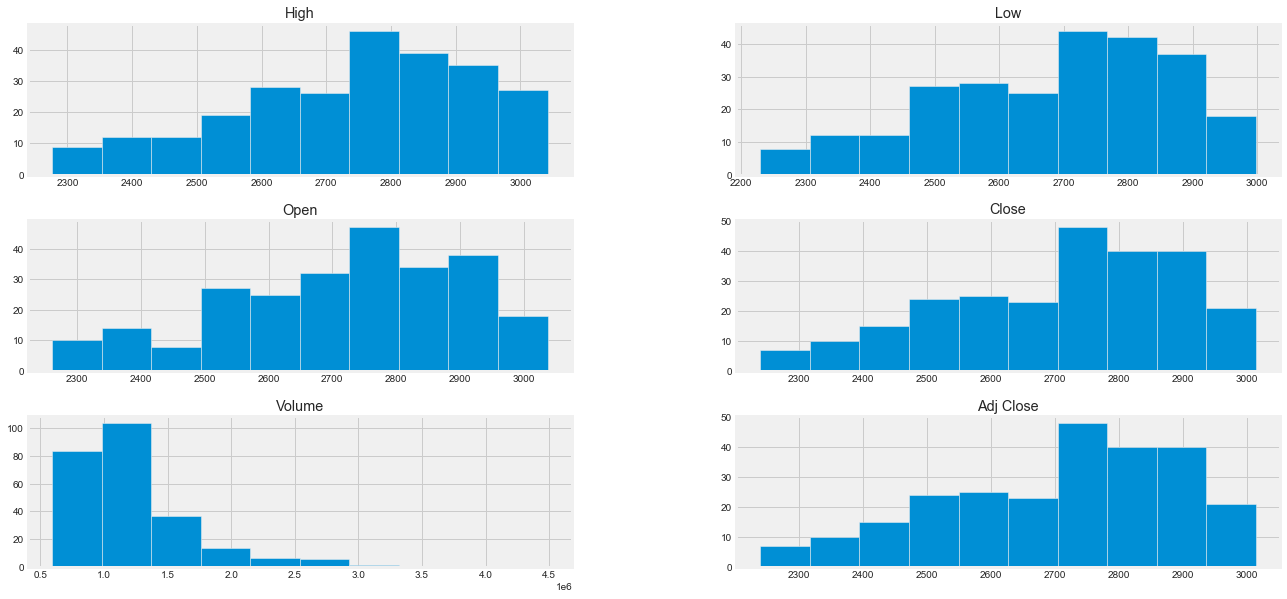

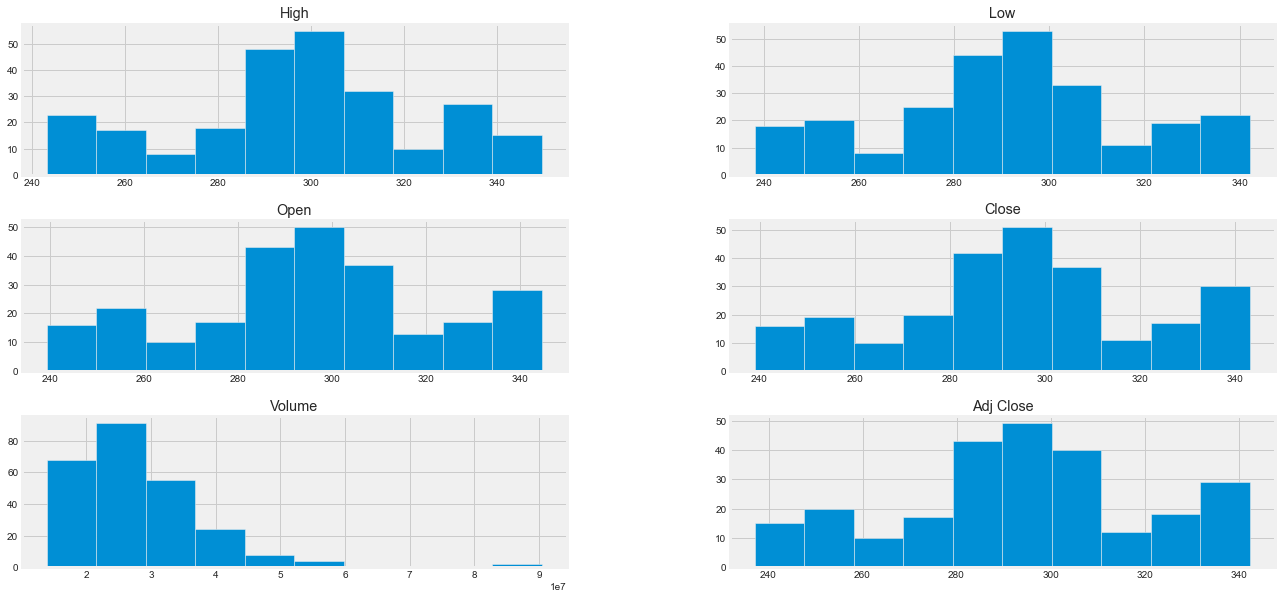

In [11]:
df.groupby("company_name").hist(figsize=(20, 10));

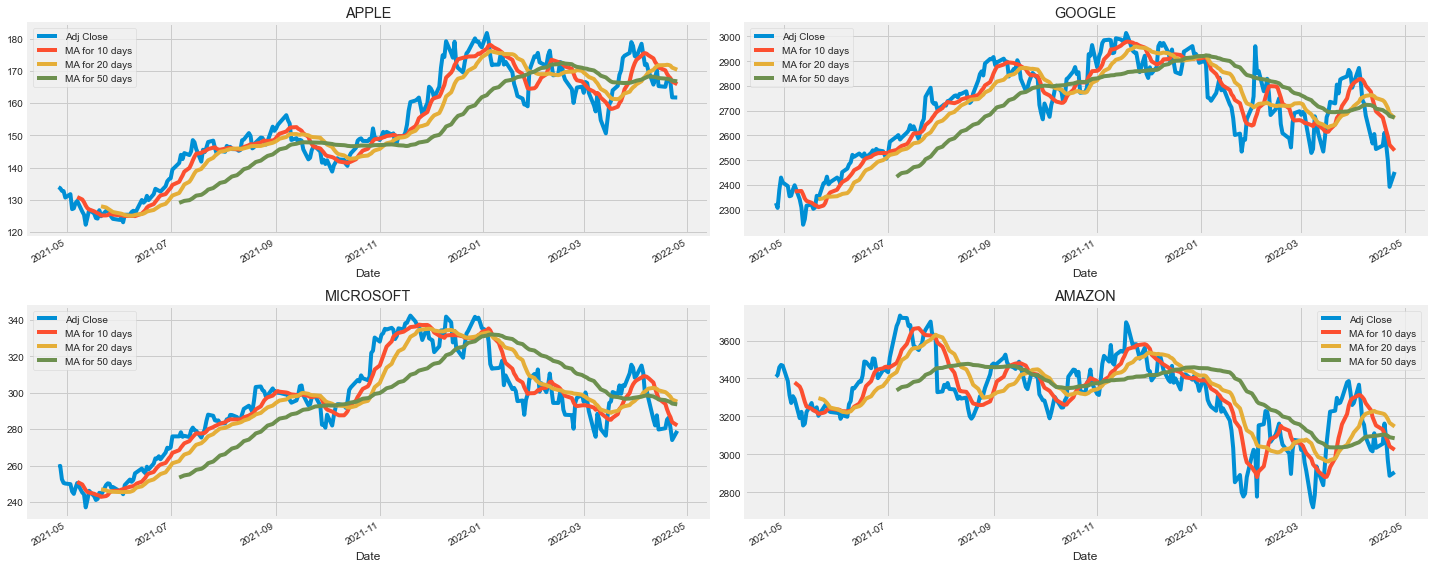

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(20)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

## 7. Daily average return of stocks

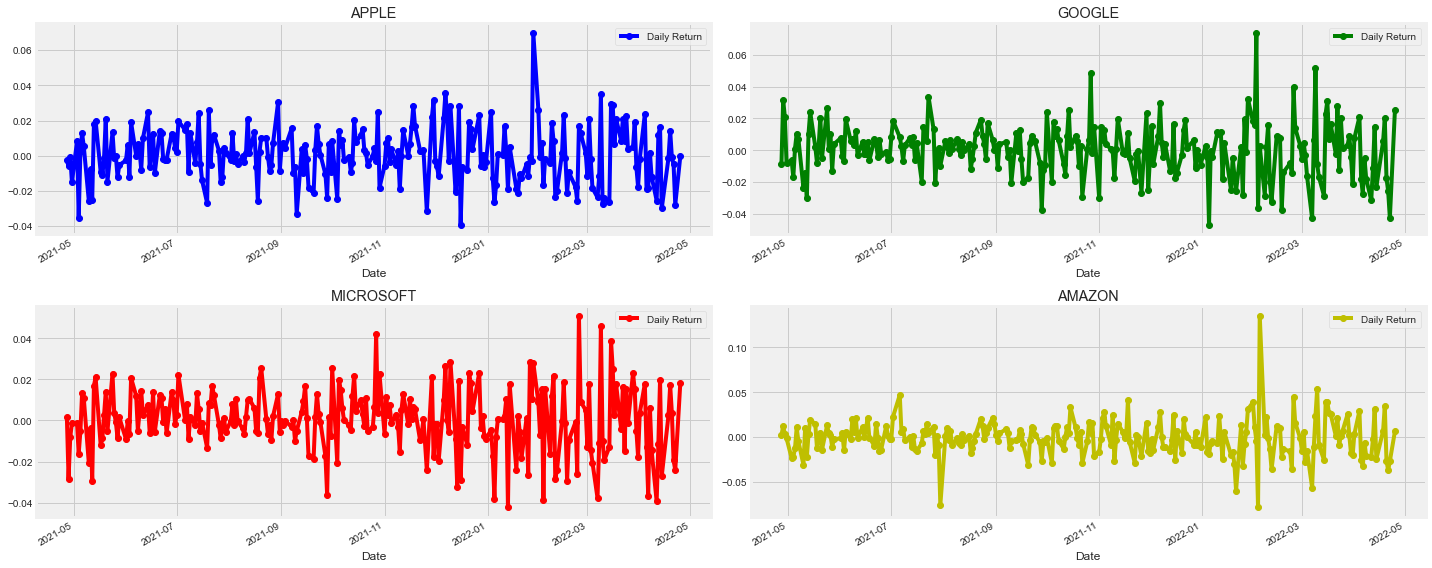

In [13]:
# Finding the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Plotting the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(20)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True,  marker='o',color='b')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True,  marker='o',color='g')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, marker='o',color='r')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True,  marker='o',color='y')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

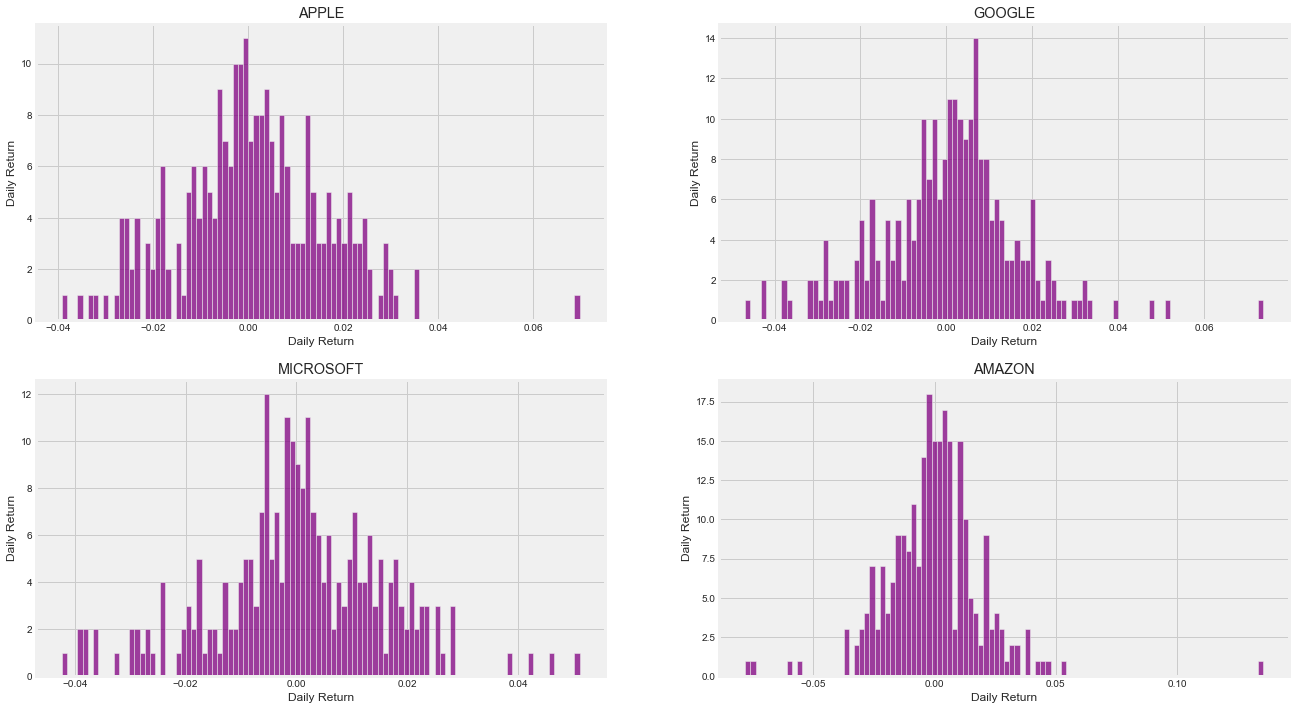

In [14]:
plt.figure(figsize=(20, 12))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    sns.histplot(company['Daily Return'].dropna(), bins=100, color='purple')
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')

## 8. Finding the correlation between stocks

In [15]:
closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']
closing_df.head() 

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-04-26,133.924026,2326.739990,259.436768,3409.000000
2021-04-27,133.595963,2307.120117,259.853394,3417.429932
2021-04-28,132.790771,2379.909912,252.503250,3458.500000
2021-04-29,132.691345,2429.889893,250.469803,3471.310059
2021-04-30,130.683304,2410.120117,250.142471,3467.419922


In [16]:
tech_rets = closing_df.pct_change()
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-04-26,NaN,NaN,NaN,NaN
2021-04-27,-0.002450,-0.008432,0.001606,0.002473
2021-04-28,-0.006027,0.031550,-0.028286,0.012018
2021-04-29,-0.000749,0.021001,-0.008053,0.003704
2021-04-30,-0.015133,-0.008136,-0.001307,-0.001121


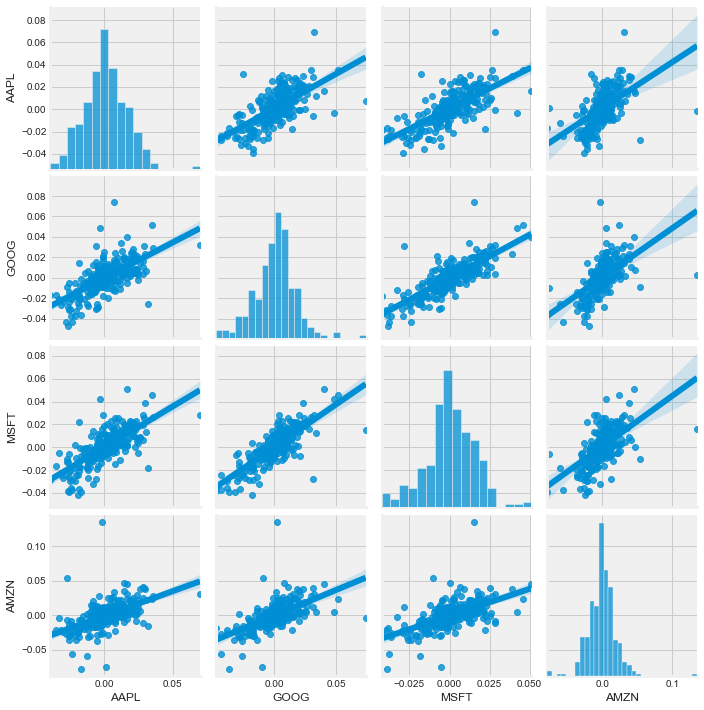

In [17]:
sns.pairplot(tech_rets, kind='reg')

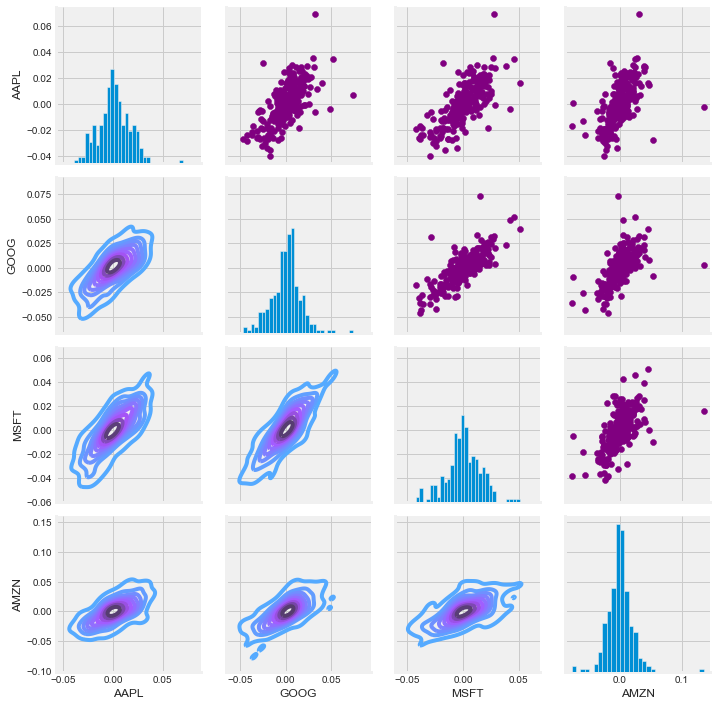

In [18]:
# Set up our figures
return_fig = sns.PairGrid(tech_rets.dropna())
return_fig.map_upper(plt.scatter, color='purple')
return_fig.map_lower(sns.kdeplot, cmap='cool_d')
return_fig.map_diag(plt.hist, bins=30)

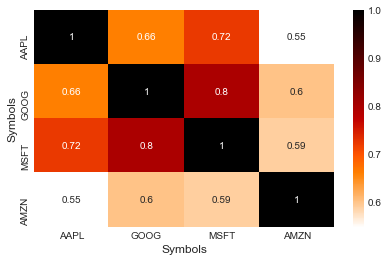

In [19]:
sns.heatmap(tech_rets.corr(), annot=True, cmap='gist_heat_r')

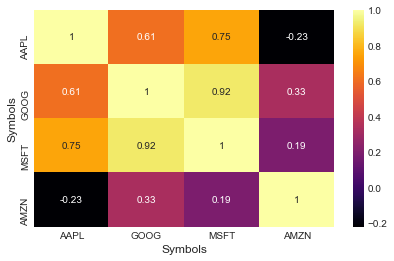

In [20]:
sns.heatmap(closing_df.corr(), annot=True, cmap='inferno')

## 9. Risk on a particular stock

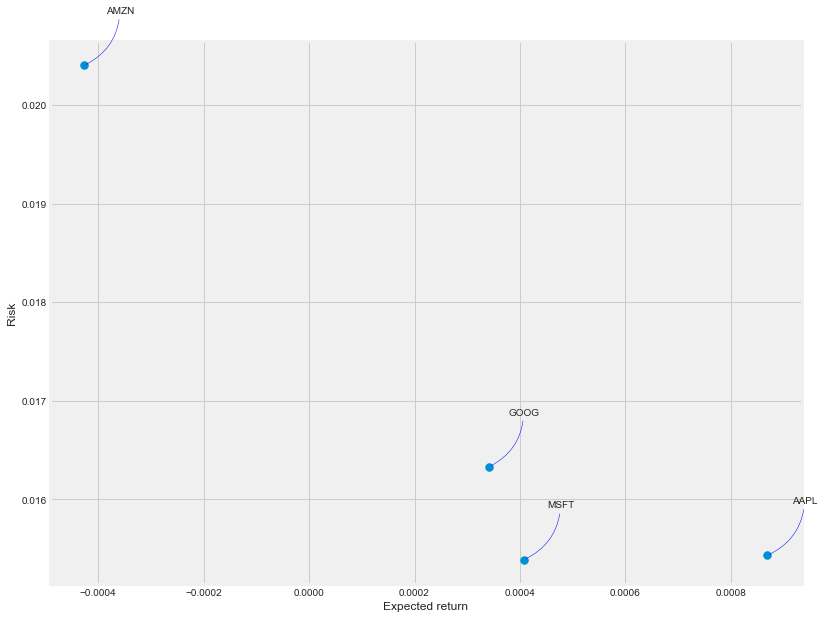

In [21]:
rets = tech_rets.dropna()

area = np.pi*20

plt.figure(figsize=(12, 10))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

In [22]:
#Getting the stock quote
df = DataReader('AAPL', data_source='yahoo', start='2012-01-01', end=datetime.now())
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.575916
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.643501
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.783869
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.917508
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.897018
...,...,...,...,...,...,...
2022-04-19,167.820007,163.910004,165.020004,167.399994,67723800.0,167.399994
2022-04-20,168.880005,166.100006,168.759995,167.229996,67929800.0,167.229996
2022-04-21,171.529999,165.910004,168.910004,166.419998,87227800.0,166.419998


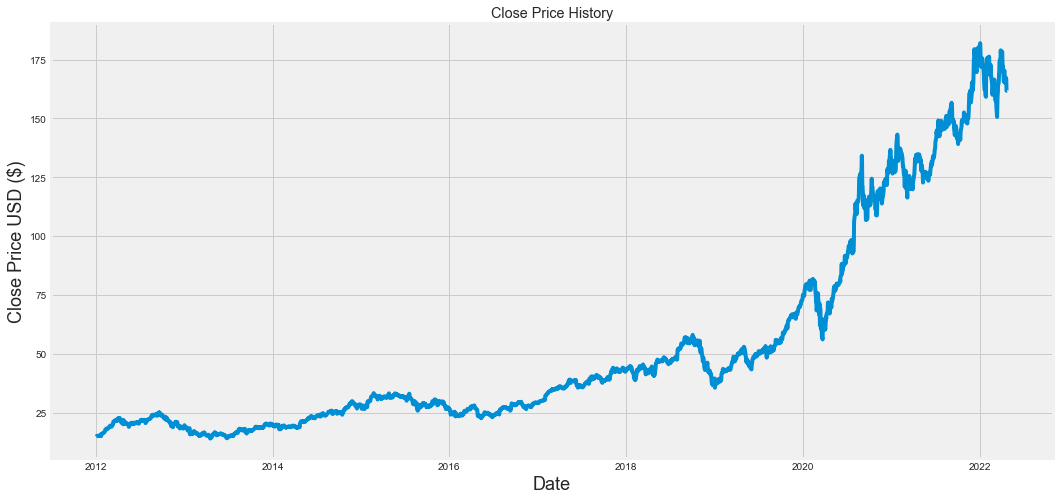

In [23]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [24]:
#Making a new dataframe with only the 'Close' column
data = df.filter(['Close'])
dataset = data.values

#Get the number of rows to train the model
training_data_len = int(np.ceil( len(dataset) * .8 ))
training_data_len

2076

In [25]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00439887],
       [0.00486851],
       [0.00584391],
       ...,
       [0.90723691],
       [0.8796876 ],
       [0.8796876 ]])

In [26]:
#Create the training data set and the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Converting x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.00439887, 0.00486851, 0.00584391, 0.00677256, 0.00663019,
       0.00695107, 0.00680444, 0.00655793, 0.00622217, 0.00726133,
       0.00819848, 0.00790947, 0.0063263 , 0.00783722, 0.00634968,
       0.01192796, 0.01149658, 0.01205972, 0.01327737, 0.01401476,
       0.01395314, 0.01372576, 0.01469479, 0.01560643, 0.01663922,
       0.01830739, 0.02181161, 0.02186474, 0.02381555, 0.02527333,
       0.0227679 , 0.02373267, 0.02371354, 0.02641875, 0.02603411,
       0.026746  , 0.02802528, 0.02873719, 0.03078787, 0.03228178,
       0.03271317, 0.03286405, 0.03030973, 0.02969346, 0.02978484,
       0.03218616, 0.03286193, 0.03431335, 0.03773469, 0.04229932,
       0.04144504, 0.04144716, 0.04474738, 0.04578017, 0.04504489,
       0.04437338, 0.04367423, 0.04599691, 0.04759072, 0.04825798])]
[0.04660893460974819]

[array([0.00439887, 0.00486851, 0.00584391, 0.00677256, 0.00663019,
       0.00695107, 0.00680444, 0.00655793, 0.00622217, 0.00726133,
       0.00819848, 0.00790947, 0.00

## 10. Stock portfolio prediction using LSTM

In [27]:
from keras import Sequential
from keras.layers import Conv2D, Flatten, Dense, LSTM

#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

# Compiling and training the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=1, epochs=1)

2016/2016 [==============================] - 37s 17ms/step - loss: 2.2032e-04


In [28]:
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

10.24681756894152

## 11. Visualizing Stock Predictions

<ipython-input-29-b4bc44056696>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


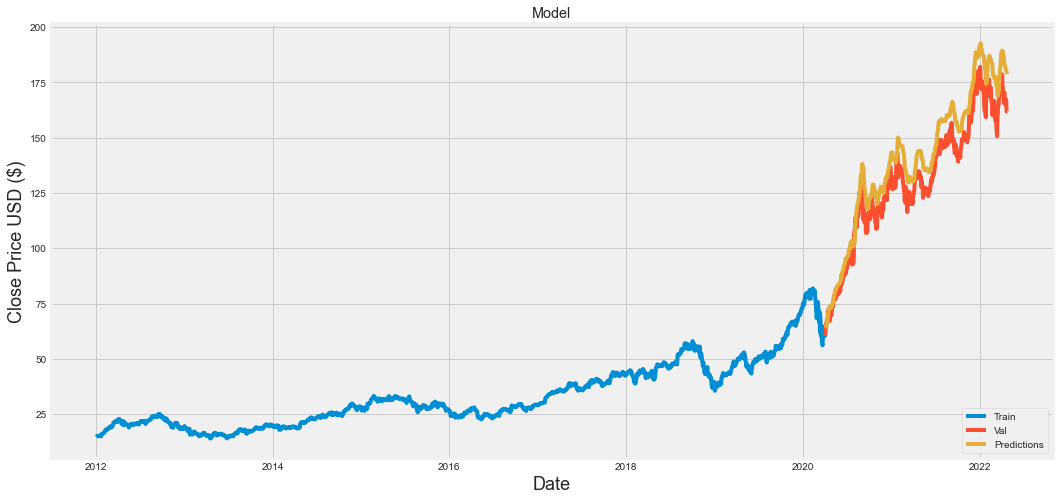

In [29]:
# Plotting the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Visualizing the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [30]:
valid

,Close,Predictions
Date,,
2020-04-03,60.352501,64.950500
2020-04-06,65.617500,64.591255
2020-04-07,64.857498,65.060478
2020-04-08,66.517502,65.677788
2020-04-09,66.997498,66.546524
...,...,...
2022-04-19,167.399994,180.685501
2022-04-20,167.229996,180.222198
2022-04-21,166.419998,180.006943


## 12. Conclusion : 

### Predicted results resemble actual values to a good extent. Hence the model is successfully executed.